In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker
import matplotlib.dates as dates

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monthlyMilkProduction.csv', index_col=0, parse_dates=True)

In [63]:
df

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0
...,...
1975-09,817.0
1975-10,827.0
1975-11,797.0


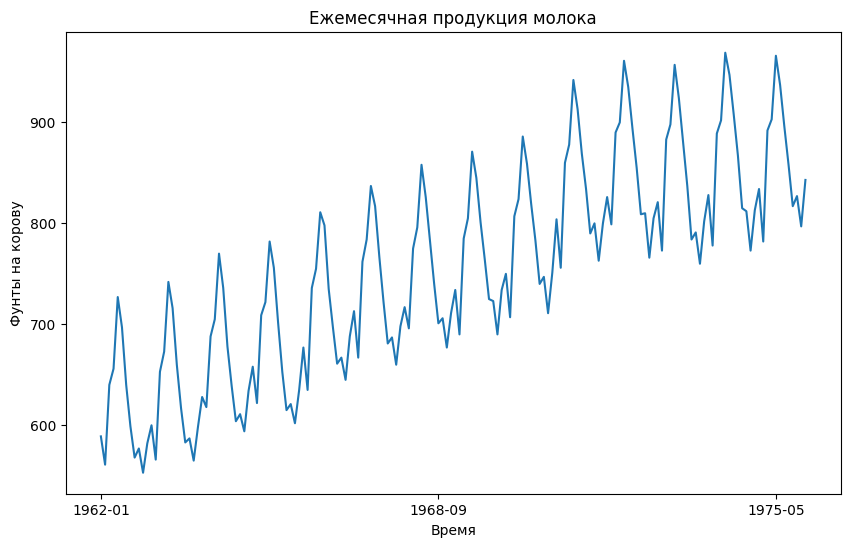

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Ежемесячная продукция молока')
plt.xlabel('Время')
plt.ylabel('Фунты на корову')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.show()

In [65]:
print(df.isnull().sum())

Monthly milk production: pounds per cow. Jan 62 ? Dec 75    1
dtype: int64


In [66]:
df.fillna(method='ffill', inplace=True)

In [67]:
df.isnull().sum()

Monthly milk production: pounds per cow. Jan 62 ? Dec 75    0
dtype: int64

Масштабирование

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,0.086538
1962-02,0.019231
1962-03,0.209135
1962-04,0.247596
1962-05,0.418269
...,...
1975-09,0.634615
1975-10,0.658654
1975-11,0.586538


In [69]:
# Загрузка данных из CSV-файла в объект Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monthlyMilkProduction.csv', index_col='Month')

# Масштабирование данных
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Разделение на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Функция для создания последовательностей данных
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Создание последовательностей данных
seq_length = 1
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Определение архитектуры модели
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Оценка производительности модели на тестовой выборке
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

# Применение модели для прогнозирования значений на новых данных
y_pred = model.predict(X_test)

# Обратное масштабирование данных
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)


Epoch 1/100
9/9 [==============================] - 2s 5ms/step - loss: 0.2053
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1694
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1385
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1100
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0850
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0634
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0255
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 13/100
9/9 [==============================] - 0s 4ms/st

2/2 [==============================] - 0s 6ms/step


In [70]:
len(test_data)

34

In [75]:
# Анализ результатов прогнозирования с помощью метрик
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_test = np.nan_to_num(test_data[:33])
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 13.554152979995262
MSE: 195.1697368611665
R2: 0.9468223906968863


In [72]:
test_data = scaler.inverse_transform(test_data)

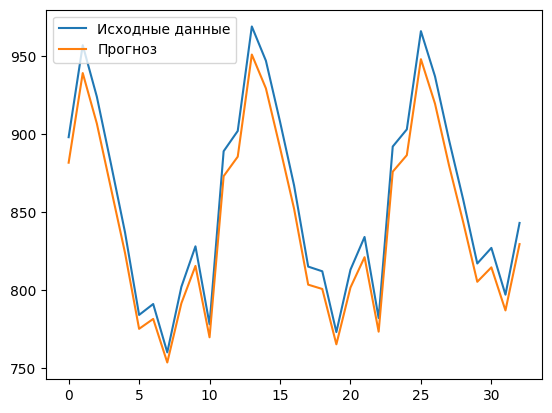

In [73]:
plt.plot(test_data, label='Исходные данные')
plt.plot(y_pred, label='Прогноз')
plt.legend()
plt.show()